# Signalverarbeitung

a) Erstellen Sie das Signal f(t) = 3sin(8πt) + 5sin(4πt) mit einer maximalen Dauer von 5s. Dieses Signal registriert Ihr Geophon im Feld und muss für die weitere Verarbeitung digital abgetastet werden. Verwenden Sie hierfür die Abtastraten 1, 5, 20 und 100Hz. Plotten Sie jeweils Ihre abgetasteten Signale. Was fällt Ihnen auf?

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline  

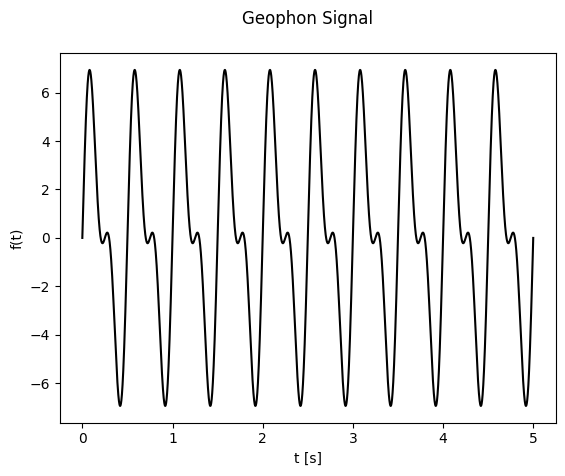

In [2]:
# Funktion zur Signalerstellung

def signal(duration, samplingfreq):
    N = int(duration * samplingfreq)
    time = np.linspace(0, duration, N)
    signal= 3 * np.sin(8 * np.pi * time) + 5 * np.sin(4 * np.pi * time)
    return signal, time

t = 5
sig, time = signal(t,1000)
 

plt.plot(time, sig, 'k-')
plt.title('Geophon Signal\n')
plt.xlabel('t [s]')
plt.ylabel('f(t)')
plt.show()

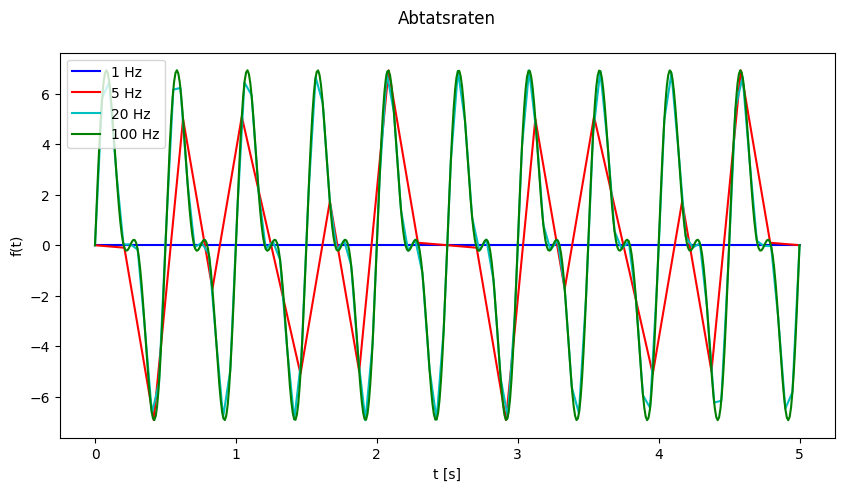

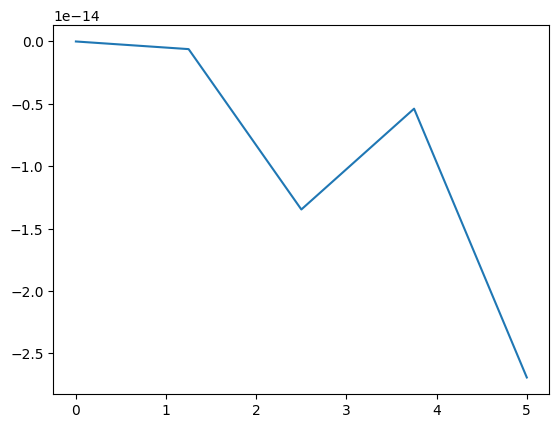

In [3]:
# Erstellung des Signals bei verschiedenen Abtatsraten

Hz1,t1 = signal(t,1)
Hz5,t5 = signal(t,5)
Hz20,t20 = signal(t,20)
Hz100,t100 = signal(t,100)

data = {}
data[1] = Hz1
data[5] = Hz5
data[20] = Hz20
data[100] = Hz100

# Plot
plt.figure(1, figsize=(10, 5))
plt.plot(t1, Hz1, 'b-', label='1 Hz')
plt.plot(t5, Hz5, 'r-', label='5 Hz')
plt.plot(t20, Hz20, 'c-', label='20 Hz')
plt.plot(t100, Hz100, 'g-', label='100 Hz')
plt.title('Abtatsraten\n')
plt.xlabel('t [s]')
plt.ylabel('f(t)')
#plt.grid()
plt.legend()
plt.show()

fig, ax = plt.subplots()
ax.plot(t1, Hz1, )

In [4]:
for key in data.keys():
    print(key)
    # do fft for each time series
    

1
5
20
100


b) Berechnen Sie die Fourier-Transformierte des Signals aus a) mit 100 Hz Abtastrate. Verwenden Sie hierfür die Funktion np.fft.fft(x, n), wobei x die Daten für die 100Hz Abtastrate und n die Anzahl der Datenpunkte ist. Plotten Sie das resultierende Amplitudenspektrum gegen die Frequenz. Interpretieren Sie Ihren Plot kurz.

Die Amplituden können sie aus dem Betrag der Fourierkoeffizienten über die Anzahl der Datenpunkte normiert erhalten. Die Frequenzen errechnen sich aus der Periode (oder Samplespacing) und der Anzahl der Datenpunkte mit np.fft.fftfreq(n,T).

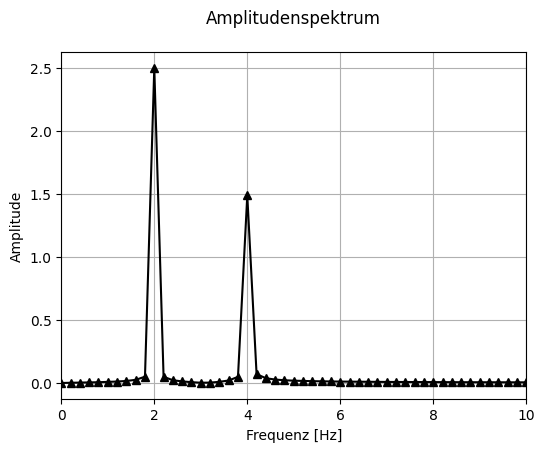

In [9]:
n = len(Hz100)
T = 1/100
N = n * 1
Data_freq = np.fft.rfft(Hz100, N)
# print(Data_freq)
freq = np.fft.rfftfreq(N, T)
Amp = abs(Data_freq)/n
plt.figure(1, figsize=(6, 4.5))
plt.plot(freq, Amp, '^-', color='k')
plt.title('Amplitudenspektrum\n')
plt.xlabel('Frequenz [Hz]')
plt.xlim([0, 10])
plt.ylabel('Amplitude')
plt.grid()
plt.show()
# Interpretation:
#  Die ursprüngliche Funktion besteht aus zwei sich überlagernden Funktionen 
# mit den Frequenzen 2 Hz und 4 Hz. Die niedrige Frequenz hat die höhere Amplitude.